# Script contents:
1. Importing libraries
2. Importing cleaned dataframe
3. Exploring relationships
   
   -Correlation
   -Scatterplot
   -Pair plot'
   -Categorical plot

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# check if matplotlib is current version 
matplotlib.__version__

'3.10.0'

In [3]:
matplotlib.__version__

'3.10.0'

In [4]:
## creating path
path = r'C:\Users\akul_\OneDrive\Documents\Tarishi\CF Data analysis bootcamp\Achievement 6\Global aqi and respiratory health outcomes'

In [5]:
df_aqi = pd.read_csv(os.path.join(path, 'Data', 'Original data', 'air_quality_health_dataset.csv'))

### A new dataframe is created to drop all the date/year that were imputed in the dataset.
### In the original data, the years were imputed with future years so that these values are easy to identify in the data.
### A new dataframe df_aqi_cleaned is created


In [7]:
# convert date into date format
df_aqi['date'] = pd.to_datetime(df_aqi['date'])

In [8]:
df_aqi_cleaned= df_aqi[df_aqi['date'].dt.year <=2025]

In [9]:
df_aqi.dtypes

city                           object
date                   datetime64[ns]
aqi                             int64
pm2_5                         float64
pm10                          float64
no2                           float64
o3                            float64
temperature                   float64
humidity                        int64
hospital_admissions             int64
population_density             object
hospital_capacity               int64
dtype: object

In [10]:
print(df_aqi_cleaned['date'].dt.year.min(), df_aqi_cleaned['date'].dt.year.max())

2020 2025


In [11]:
len(df_aqi_cleaned)

2192

In [12]:
df_aqi_cleaned.head()

city       date  aqi  pm2_5  pm10   no2    o3  temperature  \
0  Los Angeles 2020-01-01   65   34.0  52.7   2.2  38.5         33.5   
1      Beijing 2020-01-02  137   33.7  31.5  36.7  27.5         -1.6   
2       London 2020-01-03  266   43.0  59.6  30.4  57.3         36.4   
3  Mexico City 2020-01-04  293   33.7  37.9  12.3  42.7         -1.0   
4        Delhi 2020-01-05  493   50.3  34.8  31.2  35.6         33.5   

   humidity  hospital_admissions population_density  hospital_capacity  
0        33                    5              Rural               1337  
1        32                    4              Urban               1545  
2        25                   10           Suburban               1539  
3        67                   10              Urban                552  
4        72                    9           Suburban               1631

## Correlation matrix heatmap

In [14]:
# Create a subset with only continuous variables
df_num=df_aqi_cleaned.select_dtypes(include='number')


In [17]:
corr=df_num.corr() # saving the correlation matrix as corr

In [45]:
## creating heatmap using seaborn
corr_heatmap=sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [46]:
# save figure
corr_heatmap.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'corr_heatmap.png'))

#### As it is clearly seen in the heatmap that there is only one strong correlation seen between pm2.5 and hospital admissions. As the pm2.5 levels increase, the number of hospital admissions also increase 

# Scatterplots


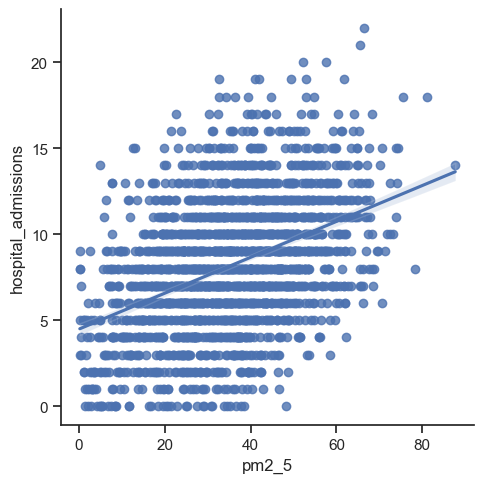

In [43]:
# create a scatterplot between pm 2.5 and hospital admissions
scatter=sns.lmplot(x = 'pm2_5', y = 'hospital_admissions', data = df_num)

In [44]:
# save figure
scatter.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatter_plot.png'))

##### The scatterplot shows a strong correlation with a steep trend line. The data density of hospital admisions are highest between 20-40 pm2.5. The trend line however flattens after pm2.5 value of 60. This means that the correlation declines after a certain range of pm2.5 levels. 

# Pair plots

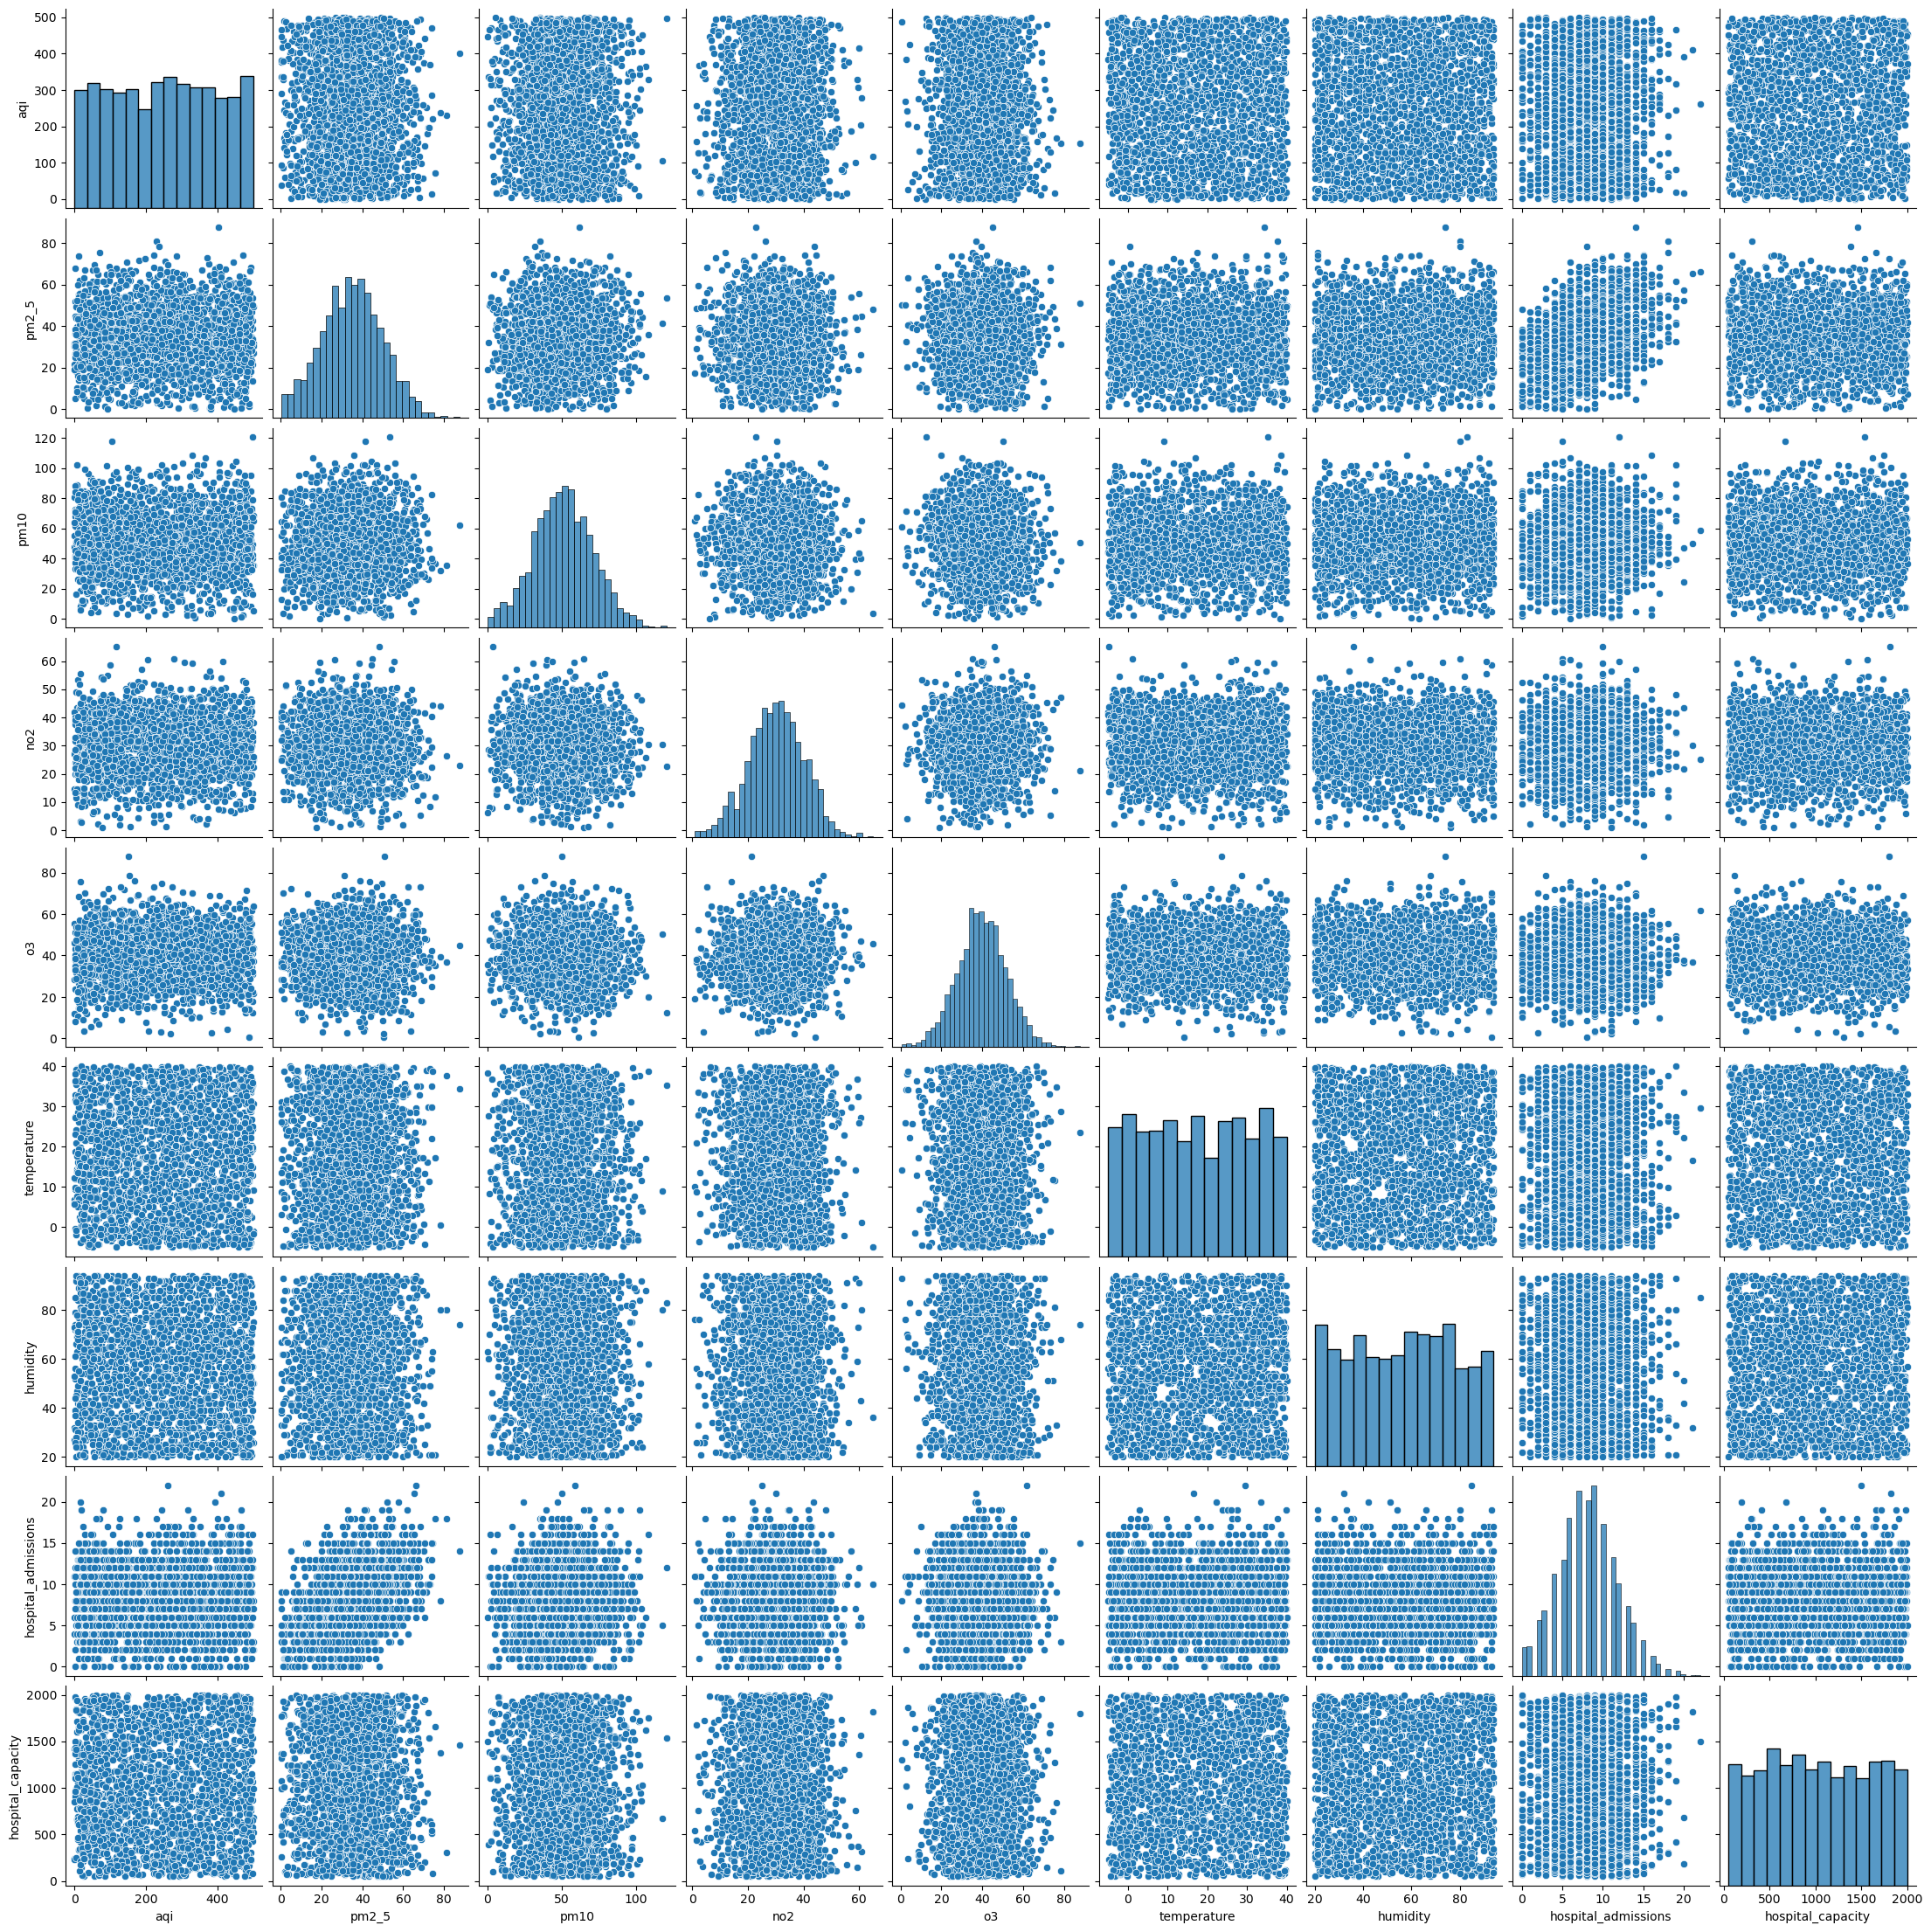

In [24]:
pair = sns.pairplot(df_aqi_cleaned)

In [42]:
# save figure
pair.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pair_plot.png'))

#### There is no other meaningful correlation seen except between hospital admissions and pm2.5. To explore further, a city wise comparison trend could be interesting to look at. Or a time series analysis including city wise monthly or annual admissions. Or hospital admissions as per population density. 

# Categorical plots

In [28]:
df_aqi_cleaned['population_density'].value_counts(dropna = False)

population_density
Urban       1331
Suburban     640
Rural        221
Name: count, dtype: int64

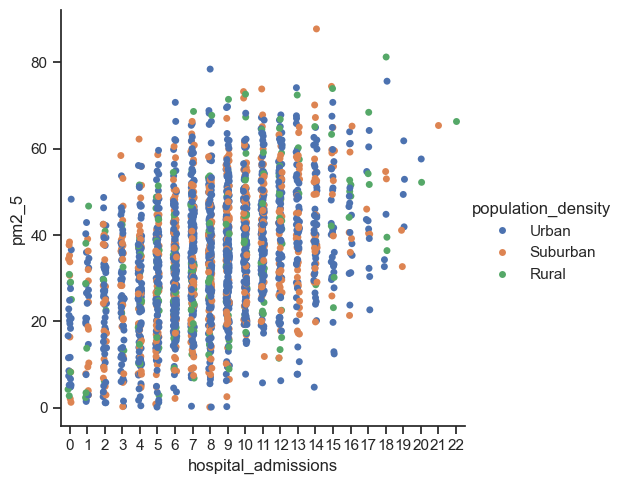

In [32]:
## categoricAL plot to see the correlation between pm2.5 and hospital admissions, based on population_density
sns.set(style="ticks")
pop_density= sns.catplot(x="hospital_admissions", y="pm2_5", hue="population_density", data=df_aqi_cleaned)

In [41]:
# save figure
pop_density.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pop_density.png'))

In [39]:
## To see the correlation between om2.5 and population density
pm2_5_density=sns.stripplot(x='population_density', y='pm2_5', data=df_aqi_cleaned, jitter=True)

plt.title('Admissions by Population Setting')
plt.xticks(rotation=45)
plt.show()  ## urban setting has maximum data points for high pm2.5

In [40]:
pm2_5_density.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pm2_5_density.png'))

#### In both plots, it is seen that urban and suburban settings have the maximum hospital admissions. This could be due to various reasons: 
1. The rural data count is, anyway lowest
2. PM2.5 is lower in rural settings due to high pollution in urban and suburban areas

## Questions answered

1. Is there an association between poor air quality and hospital admissions?
   Yes, there is a correlation of 0.52 between pm2.5 and hospital admissions. This means that when pm2.5 levels increase, the no of hospitalizations increase upto a certain level.
2. Is there a difference in air quality in different spatial settings or population density?
   Yes, the scatterplots and the categorical plots depict that. 

## Hypothesis

Does a rise in PM2.5 concentration lead to an increase in hospital admissions?

Null hypothesis (H₀): No effect of PM2.5 on hospital admissions.

Alternative hypothesis (Hₐ): A positive effect—more PM2.5 means more hospital admissions.

## There are further questions to ask after testing this hypothesis.
Is there a difference in hospital admissions between population density and cities?
Geospatial trends as well as time series trends. 

In [47]:
# Export the dataframe
df_aqi_cleaned.to_csv(os.path.join(path, 'Data', 'Prepared data', 'air_quality_cleaned.csv'))